# Лабораторная 11.9.5 (Макарова Мария)

In [309]:
import numpy as np
import math
import matplotlib.pyplot as plt


Само уравнение:
y" – P(x)y = f(x)

Теория взята со страниц 88-90 в задачнике

In [311]:
def P(x):
    return(10+np.sin(2*np.pi*x))

def f(x):
    return(np.cos(2*np.pi*x))

In [312]:
h=0.005
N=200


In [313]:
alpha = [0]*(N+1)
beta = [0]*(N+1)
gamma = [0]*(N+1)
b=[0]*(N+1)
phi = [0]*(N+1)
mu=[0]*(N+1)
nu = [0]*(N+1)


Нахожу первые прогоночные коэффициенты:

In [314]:
alpha[1]=1/(2+P(0)*h*h)
beta[1]=- (f(0)*h*h)/((2+P(0)*h*h))
gamma[1]=1/(2+P(0)*h*h)

Рекуррентно нахожу остальные:

In [315]:
for i in range (1,N):
    alpha[i+1]=1/(2+P(i*h)*h*h - alpha[i])
    beta[i+1]=(beta[i] - f(i*h)*h*h)/(2+P(i*h)*h*h - alpha[i])
    gamma[i+1]=( f (i*h) *h*h ) /(2+P(i*h)*h*h - alpha[i])

In [316]:
alpha[N]

0.9846603667284023

Теперь прогонка справа налево:

In [317]:
mu[N]= -1/(alpha[N] + gamma [N] - (2+P(N*h)*h*h) )
nu[N]= (f(N*h)*h*h - beta[N]) / (alpha[N]+gamma[N] - P(N*h)*h*h)
#nu[N]= (f(N*h)*h*h - beta[N]) / (alpha[N]+gamma[N] - P(1-h)*h*h)

In [318]:
for i in range (N,0,-1):
    mu[i-1]=alpha[i]*mu[i] + gamma[i]*mu[N]
    nu[i-1]=beta[i] + alpha[i]*nu[i]+gamma[i]*nu[N]

Теперь строю функцию во всех точках сетки:

In [319]:
y=[0]*(N+1)

In [320]:
y[0]=nu[0]/(1-mu[0])


In [321]:
for i in range(2,N+1,1):
    y[i-1] = alpha[i]*(mu[i] * y[0] + nu[i])+beta[i] + gamma[i]*(mu[N]*y[0]+nu[N])

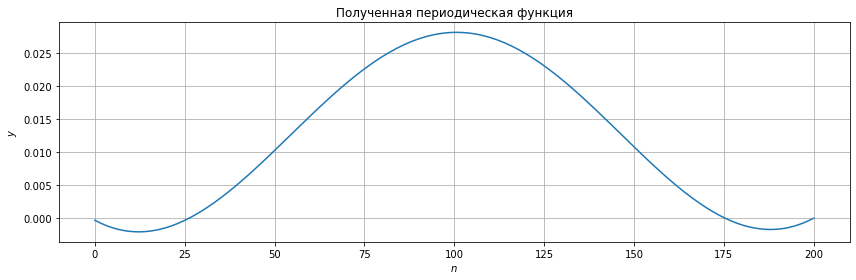

In [322]:
k = np.linspace(0,N,N+1)
plt.figure(figsize=[12, 4])
plt.plot(k, y)
plt.title("Полученная периодическая функция")
plt.xlabel("$n$")
plt.ylabel("$y$")
plt.grid()

plt.tight_layout() 
plt.show()

Все:)